In [1]:
import numpy as np
import operator 
from operator import itemgetter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [3]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions

In [4]:
from sklearn.datasets import load_digits
mnist = load_digits()
print(mnist.data.shape)
X = mnist.data 
y = mnist.target

(1797, 64)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(1347, 64) (1347,)
(450, 64) (450,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([127, 140, 136, 143, 129, 134, 133, 138, 129, 138], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 42, 41, 40, 52, 48, 48, 41, 45, 42], dtype=int64))


In [6]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [7]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9755555555555555
K = 5; Accuracy: 0.9755555555555555
K = 7; Accuracy: 0.9755555555555555
K = 9; Accuracy: 0.9755555555555555
K = 11; Accuracy: 0.9733333333333334
K = 13; Accuracy: 0.9711111111111111
K = 15; Accuracy: 0.9688888888888889
K = 17; Accuracy: 0.9666666666666667
K = 19; Accuracy: 0.9666666666666667
K = 21; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.9644444444444444
K = 25; Accuracy: 0.9644444444444444
K = 27; Accuracy: 0.9666666666666667
K = 29; Accuracy: 0.9622222222222222
K = 31; Accuracy: 0.96
K = 33; Accuracy: 0.96
K = 35; Accuracy: 0.9577777777777777
K = 37; Accuracy: 0.9577777777777777
K = 39; Accuracy: 0.9577777777777777
K = 41; Accuracy: 0.9555555555555556
K = 43; Accuracy: 0.9511111111111111
K = 45; Accuracy: 0.9488888888888889
K = 47; Accuracy: 0.9444444444444444
K = 49; Accuracy: 0.9444444444444444
K = 51; Accuracy: 0.9377777777777778
K = 53; Accuracy: 0.9355555555555556
K = 55; Accuracy: 0.9333333333333333
K = 57; Accuracy: 0.9333333333333

In [19]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

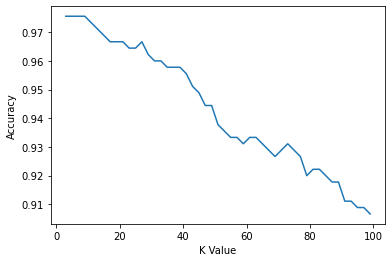

In [20]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")

In [21]:
model = KNN(K = 3) 
model.fit(X_train, y_train) 
pred = model.predict(X_train)
precision, recall, fscore, _ = precision_recall_fscore_support(y_train, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)

Precision 
 [1.         0.9929078  1.         1.         1.         1.
 0.98518519 1.         0.9921875  0.99275362]

Recall 
 [1.         1.         1.         1.         1.         0.99253731
 1.         0.99275362 0.98449612 0.99275362]

F-score 
 [1.         0.99644128 1.         1.         1.         0.99625468
 0.99253731 0.99636364 0.98832685 0.99275362]


In [9]:
model = KNN(K = 3)
model.fit(X_train, y_train)
pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)
precision, recall, fscore, _ = precision_recall_fscore_support(y_test, pred)
print("Precision \n", precision)
print("\nRecall \n", recall)
print("\nF-score \n", fscore)
print("\nAccuracy \n", acc)

Precision 
 [1.         0.89361702 1.         0.93023256 0.98113208 1.
 1.         1.         1.         0.95      ]

Recall 
 [1.         1.         0.97560976 1.         1.         0.95833333
 1.         1.         0.91111111 0.9047619 ]

F-score 
 [1.         0.94382022 0.98765432 0.96385542 0.99047619 0.9787234
 1.         1.         0.95348837 0.92682927]

Accuracy 
 0.9755555555555555


In [29]:
conf_mx = confusion_matrix(y_test, pred)
conf_mx

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  3,  0,  0,  0,  0,  0,  0,  3],
       [ 0,  0, 36,  1,  0,  0,  0,  2,  2,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  1,  1,  0],
       [ 0,  2,  0,  0, 48,  0,  0,  2,  0,  0],
       [ 1,  0,  0,  0,  1, 41,  0,  0,  0,  5],
       [ 1,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 41,  0,  0],
       [ 0,  5,  1,  1,  0,  0,  1,  1, 34,  2],
       [ 0,  3,  0,  1,  0,  0,  0,  2,  0, 36]], dtype=int64)